# **Project Title : Breast Cancer Detection Using ANN**

**Problem Statement : To detect whether Breast Tumour is Malignant (Cancerous) or Benign (Non-Cancerous) by following features :**

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Drop unnecessary columns**

In [5]:
df.drop(["id" , "Unnamed: 32"], inplace=True , axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Checking for Missing Data in the Dataset**

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no Missing Values in the dataset

**Checking for Datatypes in the Dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

From above it can be noted that there is only one Categorical Column & other columns are Numerical Columns.

# **EDA**

**Independent Variable (Categorical)**

In [8]:
#to visualize ratio of types of Cancer

In [9]:
#Analysis by Countplot

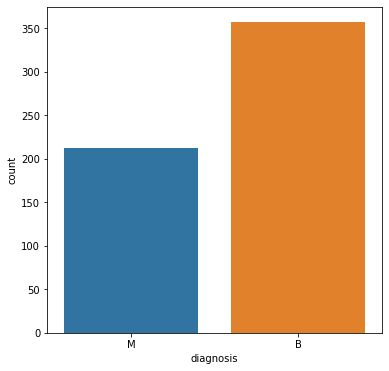

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="diagnosis")

From above plot it can be noted that count of Benign Tumour (noncancerous) is more.


**Independent Variable (Numerical)**

In [11]:
#Analysis by Barplot

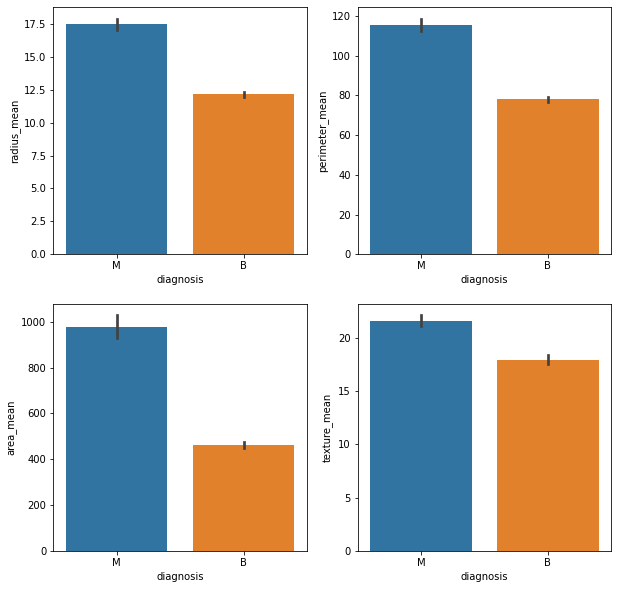

In [12]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='diagnosis',y='radius_mean',data=df,ax=ax[0][0])
sns.barplot(x='diagnosis',y='perimeter_mean',data=df,ax=ax[0][1])
sns.barplot(x='diagnosis',y='area_mean',data=df,ax=ax[1][0])
sns.barplot(x='diagnosis',y='texture_mean',data=df,ax=ax[1][1])

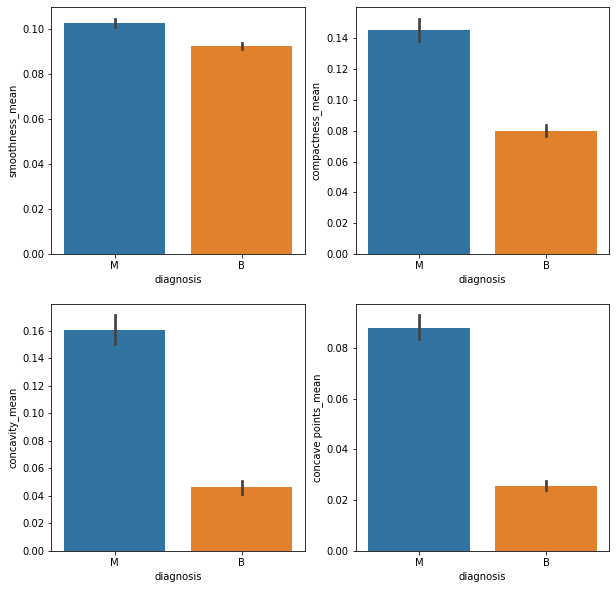

In [13]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='diagnosis',y='smoothness_mean',data=df,ax=ax[0][0])
sns.barplot(x='diagnosis',y='compactness_mean',data=df,ax=ax[0][1])
sns.barplot(x='diagnosis',y='concavity_mean',data=df,ax=ax[1][0])
sns.barplot(x='diagnosis',y='concave points_mean',data=df,ax=ax[1][1])

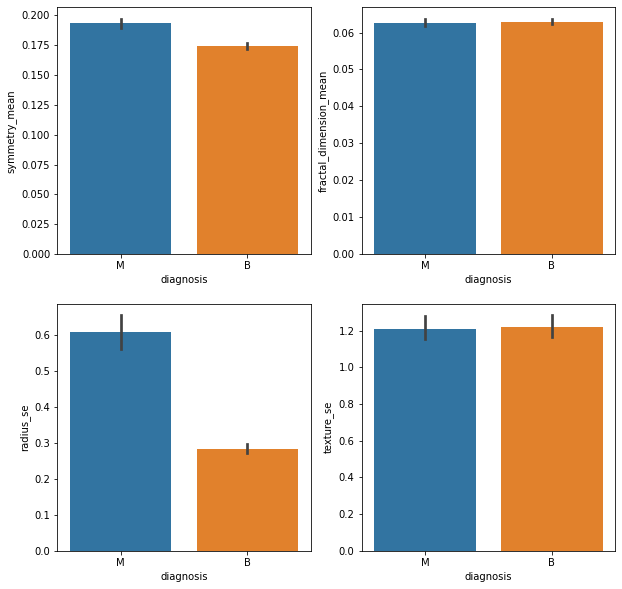

In [14]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='diagnosis',y='symmetry_mean',data=df,ax=ax[0][0])
sns.barplot(x='diagnosis',y='fractal_dimension_mean',data=df,ax=ax[0][1])
sns.barplot(x='diagnosis',y='radius_se',data=df,ax=ax[1][0])
sns.barplot(x='diagnosis',y='texture_se',data=df,ax=ax[1][1])

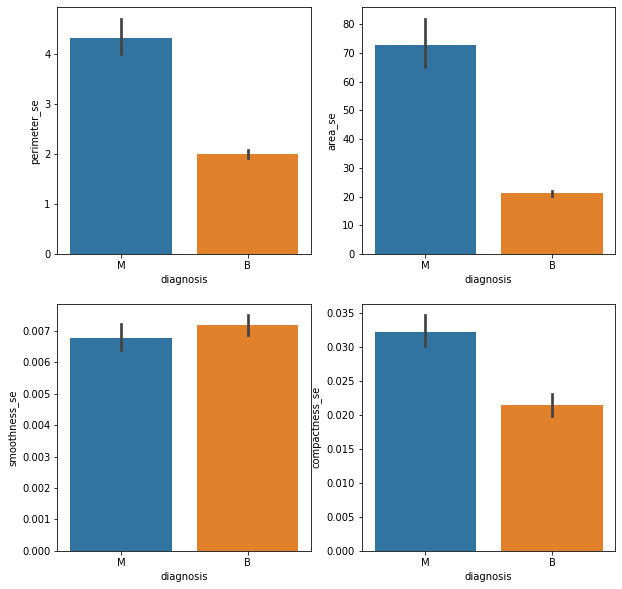

In [15]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='diagnosis',y='perimeter_se',data=df,ax=ax[0][0])
sns.barplot(x='diagnosis',y='area_se',data=df,ax=ax[0][1])
sns.barplot(x='diagnosis',y='smoothness_se',data=df,ax=ax[1][0])
sns.barplot(x='diagnosis',y='compactness_se',data=df,ax=ax[1][1])

In [16]:
#Analysis by Violinplot

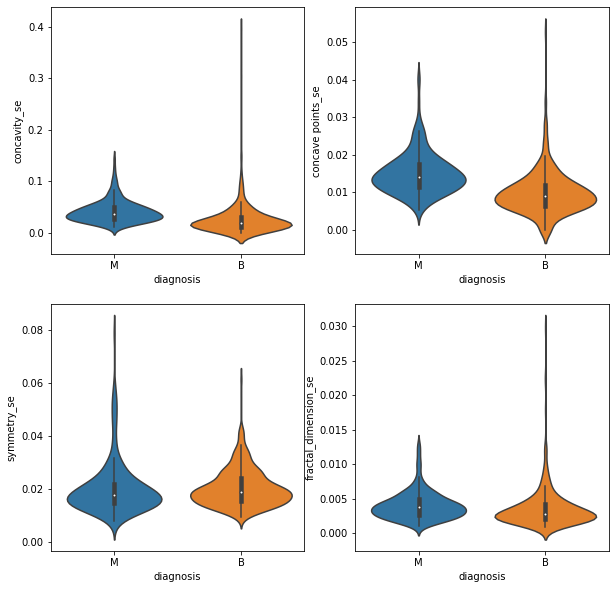

In [17]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.violinplot(x='diagnosis',y='concavity_se',data=df,ax=ax[0][0])
sns.violinplot(x='diagnosis',y='concave points_se',data=df,ax=ax[0][1])
sns.violinplot(x='diagnosis',y='symmetry_se',data=df,ax=ax[1][0])
sns.violinplot(x='diagnosis',y='fractal_dimension_se',data=df,ax=ax[1][1])

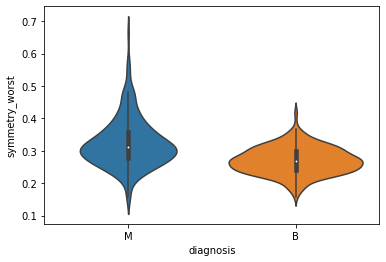

In [18]:
sns.violinplot(x='diagnosis',y='symmetry_worst',data=df)

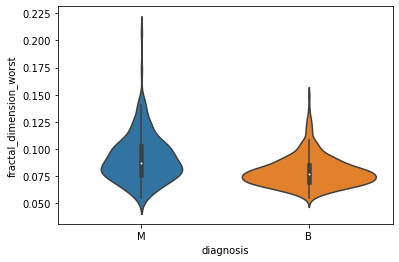

In [19]:
sns.violinplot(x='diagnosis',y='fractal_dimension_worst',data=df)

In [20]:
#Analysis by BOXPLOT

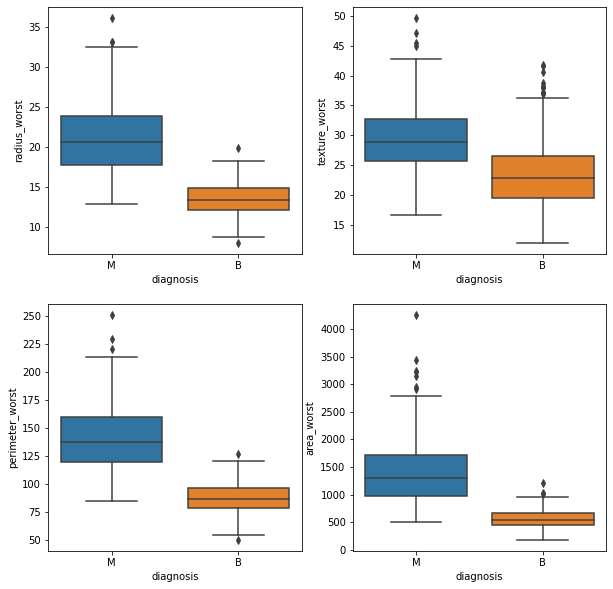

In [21]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='diagnosis',y='radius_worst',data=df,ax=ax[0][0])
sns.boxplot(x='diagnosis',y='texture_worst',data=df,ax=ax[0][1])
sns.boxplot(x='diagnosis',y='perimeter_worst',data=df,ax=ax[1][0])
sns.boxplot(x='diagnosis',y='area_worst',data=df,ax=ax[1][1])

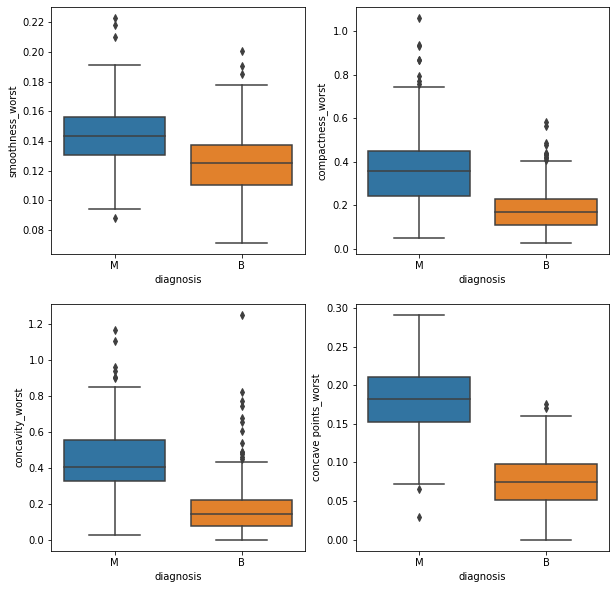

In [22]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='diagnosis',y='smoothness_worst',data=df,ax=ax[0][0])
sns.boxplot(x='diagnosis',y='compactness_worst',data=df,ax=ax[0][1])
sns.boxplot(x='diagnosis',y='concavity_worst',data=df,ax=ax[1][0])
sns.boxplot(x='diagnosis',y='concave points_worst',data=df,ax=ax[1][1])

From above plots it can be noted that there are Outliers in each Feature

# **Preprocessing**

**Handling Categorical Data**

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now all Categorical data is removed

### **Handling Outliers**

In [26]:
#to detect skewness in various features

In [27]:
df_num = df.select_dtypes(['float64' , 'int64'])

In [28]:
df_num = df_num.drop('diagnosis', axis=1)

In [29]:
df1 = df['diagnosis']
df1.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [30]:
df_new = pd.concat([df_num , df1] , axis=1)

In [31]:
df_new.shape

(569, 31)

In [32]:
df_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


radius_mean = 0.9398934455576345


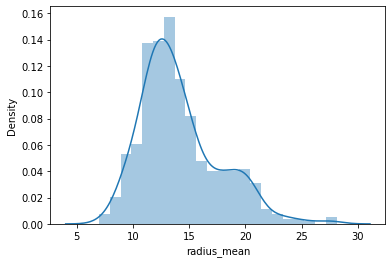

-------------------------------------------------------------------------------
texture_mean = 0.6487335672867015


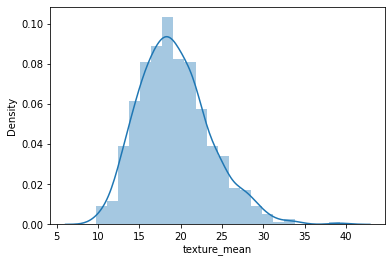

-------------------------------------------------------------------------------
perimeter_mean = 0.9880369541677213


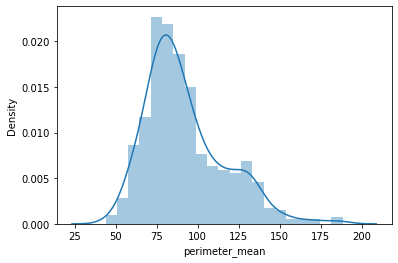

-------------------------------------------------------------------------------
area_mean = 1.6413905092044112


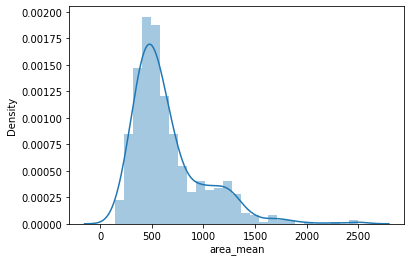

-------------------------------------------------------------------------------
smoothness_mean = 0.4551199203571747


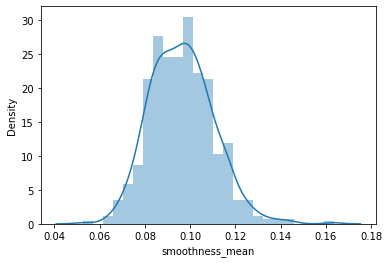

-------------------------------------------------------------------------------
compactness_mean = 1.186983323974523


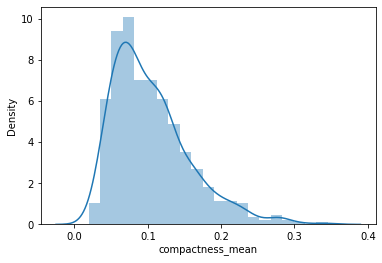

-------------------------------------------------------------------------------
concavity_mean = 1.3974832352826647


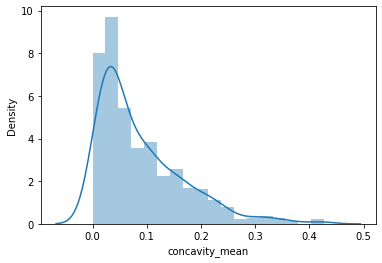

-------------------------------------------------------------------------------
concave points_mean = 1.1680903481012583


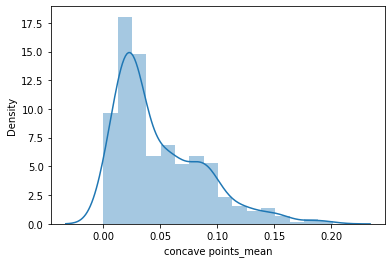

-------------------------------------------------------------------------------
symmetry_mean = 0.7236947177154986


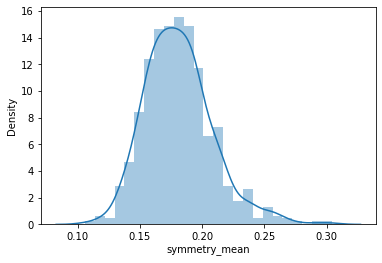

-------------------------------------------------------------------------------
fractal_dimension_mean = 1.3010473927890858


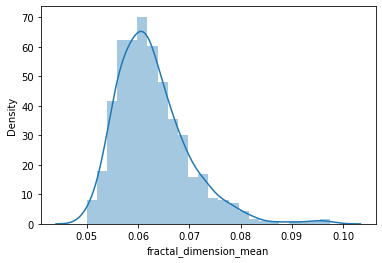

-------------------------------------------------------------------------------
radius_se = 3.0804639853352045


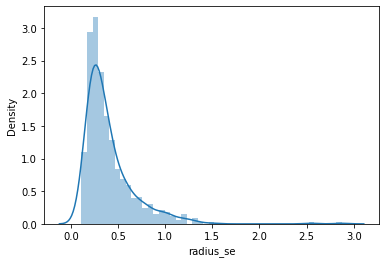

-------------------------------------------------------------------------------
texture_se = 1.6421002649479612


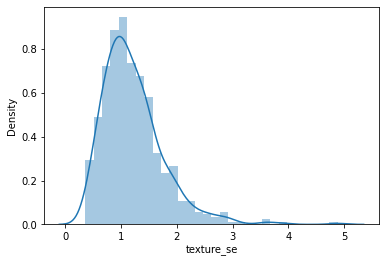

-------------------------------------------------------------------------------
perimeter_se = 3.4345304746147054


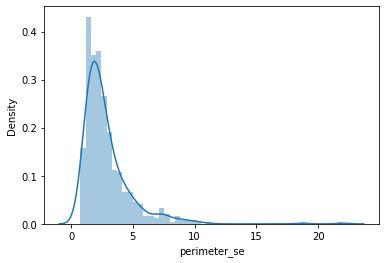

-------------------------------------------------------------------------------
area_se = 5.432815862951913


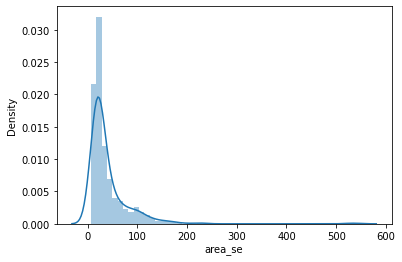

-------------------------------------------------------------------------------
smoothness_se = 2.3083442210459832


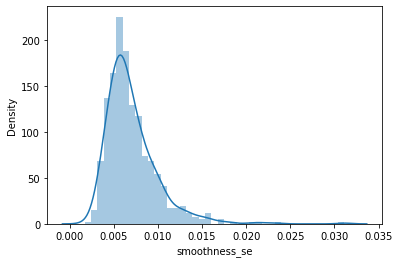

-------------------------------------------------------------------------------
compactness_se = 1.8972023914083855


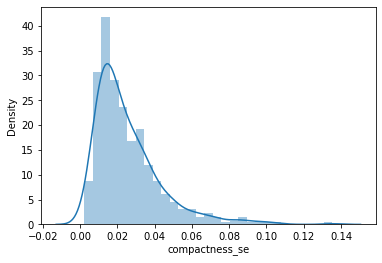

-------------------------------------------------------------------------------
concavity_se = 5.096980949017036


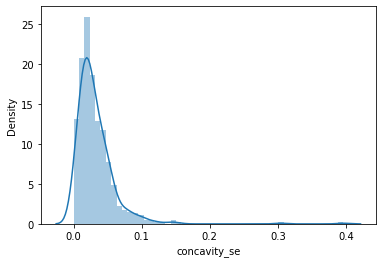

-------------------------------------------------------------------------------
concave points_se = 1.4408668862917


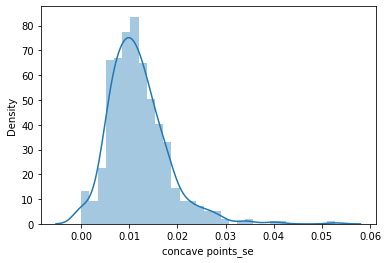

-------------------------------------------------------------------------------
symmetry_se = 2.1893418389258343


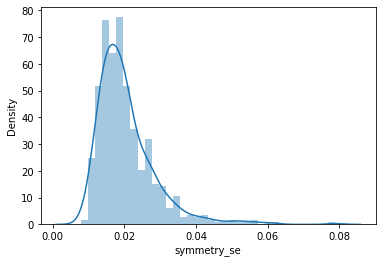

-------------------------------------------------------------------------------
fractal_dimension_se = 3.913616654675261


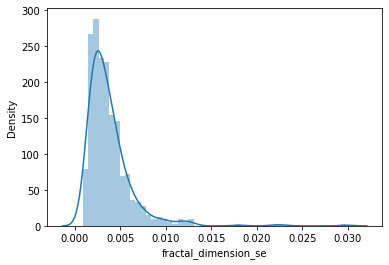

-------------------------------------------------------------------------------
radius_worst = 1.1002050372722139


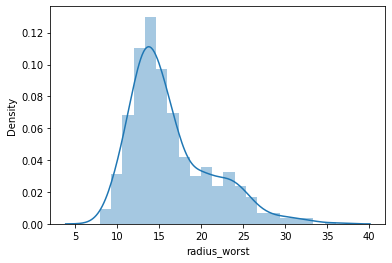

-------------------------------------------------------------------------------
texture_worst = 0.4970066697616781


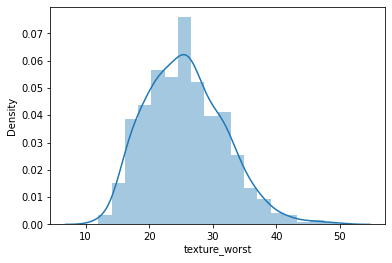

-------------------------------------------------------------------------------
perimeter_worst = 1.1251876208771259


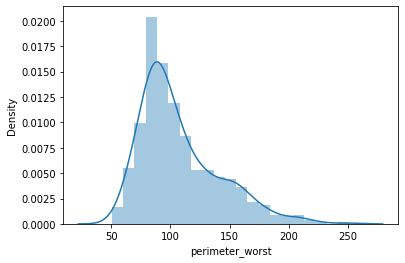

-------------------------------------------------------------------------------
area_worst = 1.8544679916096252


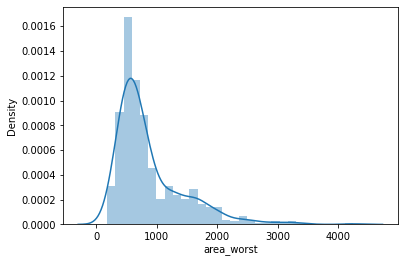

-------------------------------------------------------------------------------
smoothness_worst = 0.41433004572343024


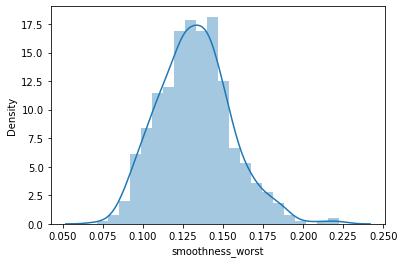

-------------------------------------------------------------------------------
compactness_worst = 1.469667461095755


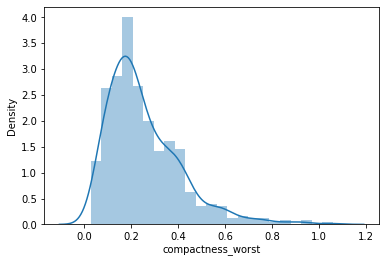

-------------------------------------------------------------------------------
concavity_worst = 1.147202339994203


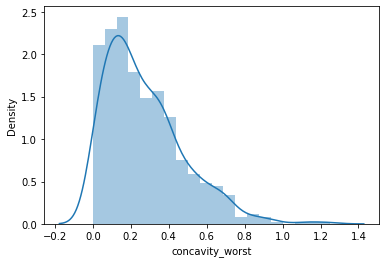

-------------------------------------------------------------------------------
concave points_worst = 0.4913159397943974


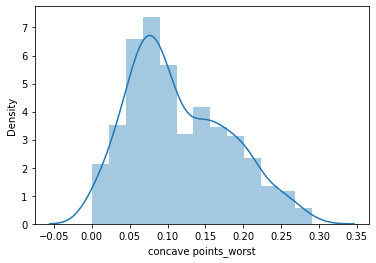

-------------------------------------------------------------------------------
symmetry_worst = 1.430144867754064


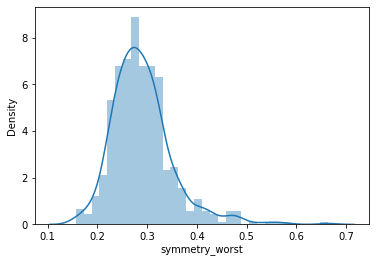

-------------------------------------------------------------------------------
fractal_dimension_worst = 1.6581931550477538


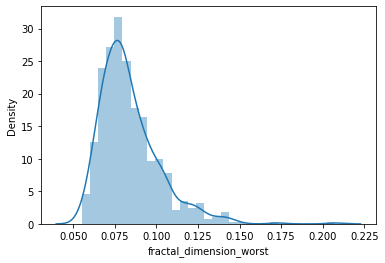

-------------------------------------------------------------------------------


In [33]:
from scipy.stats import skew
for col in df_num:
  print(f"{col} = {skew(df_num[col])}")
  sns.distplot(df_num[col])
  plt.show()
  print("-------------------------------------------------------------------------------")


From above plots skewness can be noted as follows :
1.   radius_mean = 0.9398934455576345 : positive skewness
2.   texture_mean = 0.6487335672867015 : positive skewness
1.   perimeter_mean = 0.9880369541677213 : positive skewness
1.   area_mean = 1.6413905092044112 : positive skewness
1.   smoothness_mean = 0.4551199203571747 : no skewness
1.   compactness_mean = 1.186983323974523 : positive skewness
1.   concavity_mean = 1.3974832352826647 : positive skewness
8.concave points_mean = 1.1680903481012583 : positive skewness
1.   symmetry_mean = 0.7236947177154986 : positive skewness
2.   fractal_dimension_mean = 1.3010473927890858 : positive skewness
1.   radius_se = 3.0804639853352045 : positive skewness
2.   texture_se = 1.6421002649479612 : positive skewness
1.   perimeter_se = 3.4345304746147054 : positive skewness
1.   area_se = 5.432815862951913 : positive skewness
2.   smoothness_se = 2.3083442210459832 : positive skewness
2.   compactness_se = 1.8972023914083855 : positive skewness
1.   concavity_se = 5.096980949017036 : positive skewness
1.   concave points_se = 1.4408668862917 : positive skewness
2.   symmetry_se = 2.1893418389258343 : positive skewness
2.   fractal_dimension_se = 3.913616654675261 : positive skewness
1.   radius_worst = 1.1002050372722139 : positive skewness
1.   texture_worst = 0.4970066697616781 : no skewness
1.   perimeter_worst = 1.1251876208771259 : positive skewness
2.   area_worst = 1.8544679916096252 : positive skewness
2.   smoothness_worst = 0.41433004572343024 : no skewness
2.   compactness_worst = 1.469667461095755 : positive skewness
1.   concavity_worst = 1.147202339994203 : positive skewness
2.   concave points_worst = 0.4913159397943974 :  no skewness
1.   symmetry_worst = 1.430144867754064 : positive skewness
2.   fractal_dimension_worst = 1.6581931550477538 : positive skewness

Checking Co-orelation of independent variables with target by Heatmap

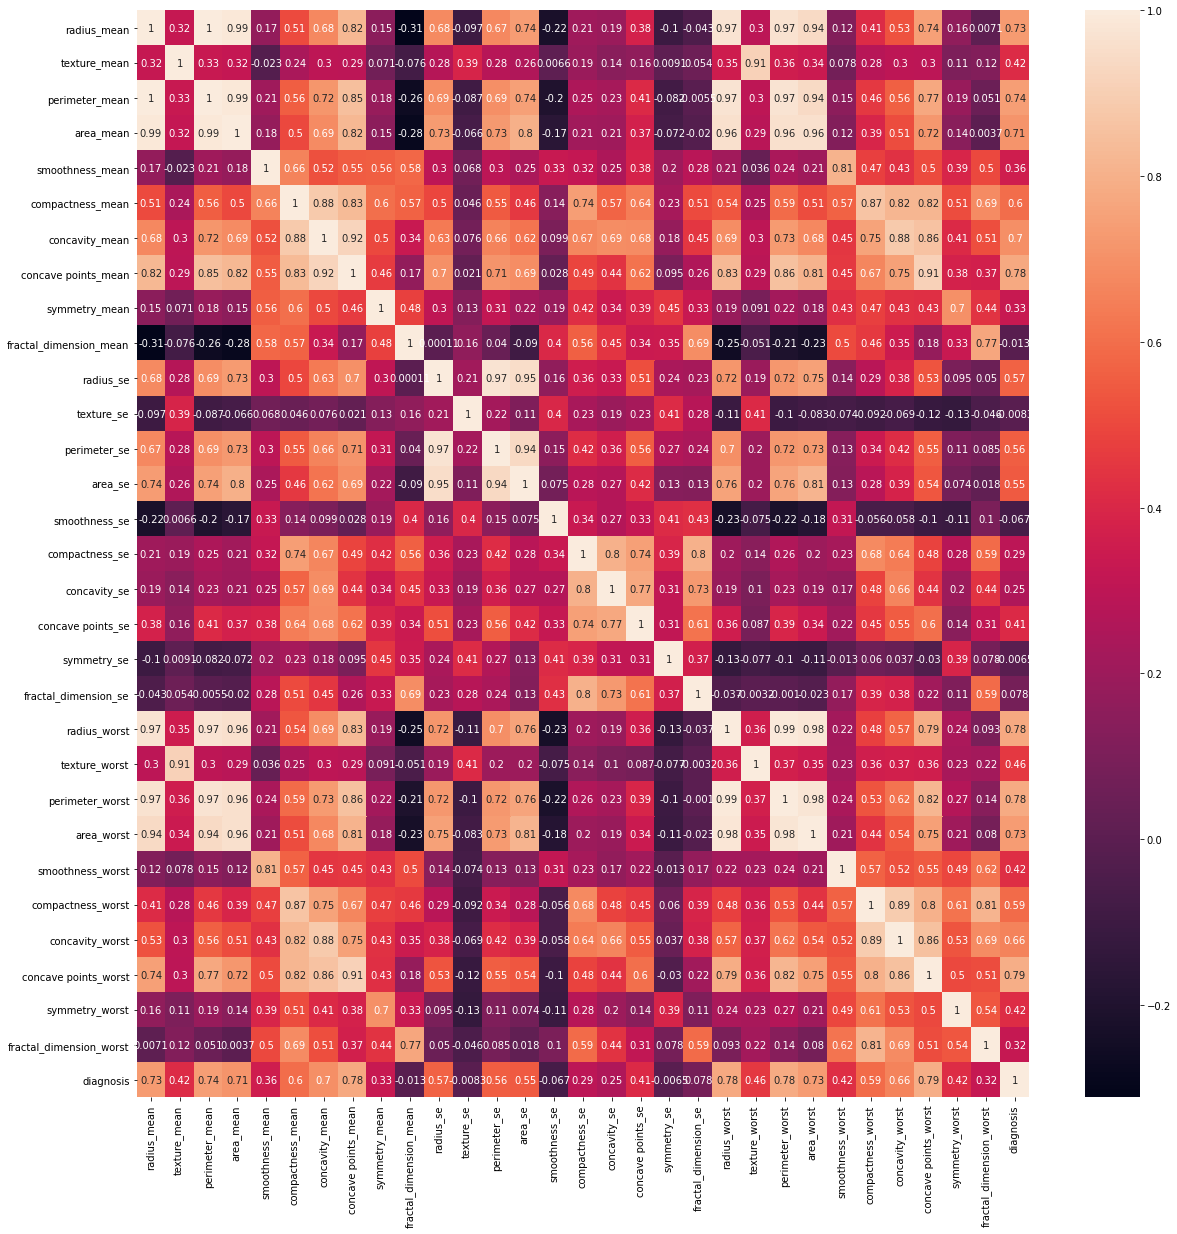

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [35]:
#from above Heatmap where there is no correlation between the features , we will reduce its skewness

In [36]:
#to reduce skewness in texture_mean feature
#to find minimum value in this features's data
min(df_new["texture_mean"])

9.71

In [37]:
skew(np.cbrt(df_new['texture_mean']))

0.20020729668755538

In [38]:
df_new['texture_mean']=np.cbrt(df_new['texture_mean'])

0.20020729668755538


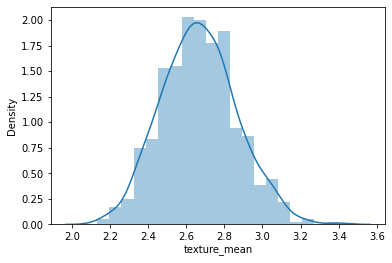

In [39]:
print(skew(df_new["texture_mean"]))
sns.distplot(df_new["texture_mean"])
plt.show()

In [40]:
#to reduce skewness in symmetry_mean feature

In [41]:
#to find minimum value in this features's data
min(df_new["symmetry_mean"])

0.106

In [42]:
skew(np.log(df_new['symmetry_mean']))

0.16526411952664782

In [43]:
df_new['symmetry_mean']=np.log(df_new['symmetry_mean'])

0.16526411952664782


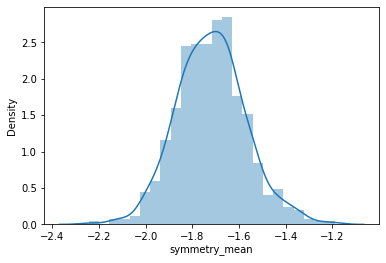

In [44]:
print(skew(df_new["symmetry_mean"]))
sns.distplot(df_new["symmetry_mean"])
plt.show()

In [45]:
#to reduce skewness in fractal_dimension_mean

In [46]:
#to find minimum value in this features's data
min(df_new["fractal_dimension_mean"])

0.049960000000000004

In [47]:
skew(np.log(df_new['fractal_dimension_mean']))

0.8513209977705904

In [48]:
df_new['fractal_dimension_mean']=np.log(df_new['fractal_dimension_mean'])

0.8513209977705904


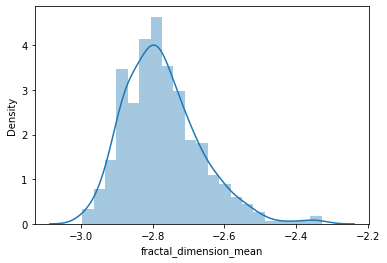

In [49]:
print(skew(df_new["fractal_dimension_mean"]))
sns.distplot(df_new["fractal_dimension_mean"])
plt.show()

In [50]:
#to reduce skewness in texture_se feature

In [51]:
min(df_new["texture_se"])

0.3602

In [52]:
skew(np.log(df_new['texture_se']))

0.02911352471103664

In [53]:
df_new['texture_se']=np.log(df_new['texture_se'])

0.02911352471103664


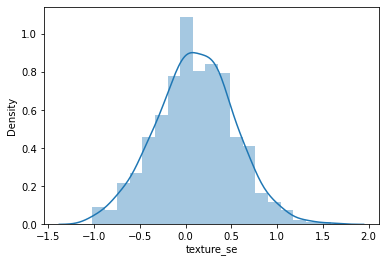

In [54]:
print(skew(df_new["texture_se"]))
sns.distplot(df_new["texture_se"])
plt.show()

In [55]:
#to reduce skewness in smoothness_se feature

In [56]:
min(df_new['smoothness_se'])

0.001713

In [57]:
skew(np.log(df_new['smoothness_se']))

0.4032971758778112

In [58]:
df_new['smoothness_se']=np.log(df_new['smoothness_se'])

0.4032971758778112


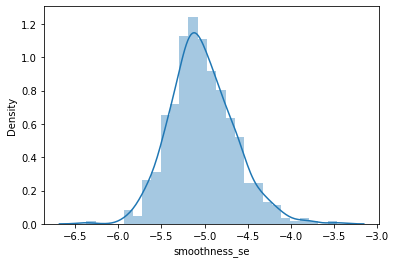

In [59]:
print(skew(df_new["smoothness_se"]))
sns.distplot(df_new["smoothness_se"])
plt.show()

In [60]:
#to reduce skewness in compactness_se feature

In [61]:
min(df_new['compactness_se'])

0.002252

In [62]:
skew(np.cbrt(df_new['compactness_se']))

0.5984431219292136

In [63]:
df_new['compactness_se']=np.cbrt(df_new['compactness_se'])

0.5984431219292136


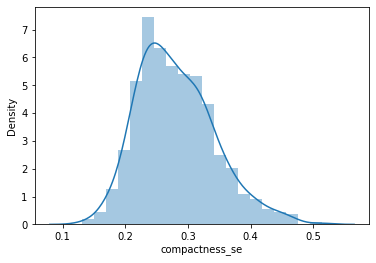

In [64]:
print(skew(df_new["compactness_se"]))
sns.distplot(df_new["compactness_se"])
plt.show()

In [65]:
#to reduce skewness in concavity_se feature

In [66]:
min(df_new['concavity_se'])

0.0

In [67]:
#as minimum value is zero so , we will not reduce its skewness

In [68]:
#to reduce skewness in concavity_se feature

In [69]:
min(df_new['concave points_se'])

0.0

In [70]:
#as minimum value is zero so , we will not reduce its skewness

In [71]:
#to reduce skewness in symmetry_se feature

In [72]:
min(df_new['symmetry_se'])

0.007882

In [73]:
skew(np.log(df_new['symmetry_se']))

0.687597720502291

In [74]:
df_new['symmetry_se']=np.log(df_new['symmetry_se'])

0.687597720502291


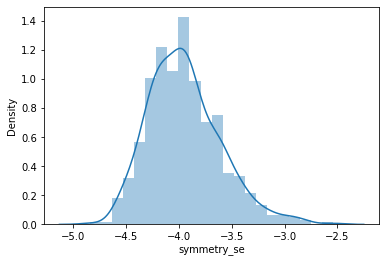

In [75]:
print(skew(df_new["symmetry_se"]))
sns.distplot(df_new["symmetry_se"])
plt.show()

In [76]:
#to reduce skewness in fractal_dimension_se feature

In [77]:
min(df_new['fractal_dimension_se'])

0.0008948000000000001

In [78]:
skew(np.log(df_new['fractal_dimension_se']))

0.5286768228446963

In [79]:
df_new['fractal_dimension_se']=np.log(df_new['fractal_dimension_se'])

0.5286768228446963


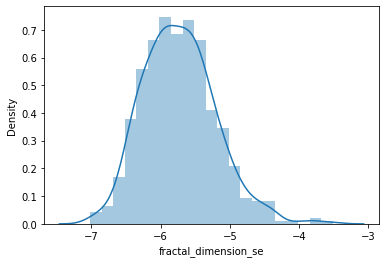

In [80]:
print(skew(df_new["fractal_dimension_se"]))
sns.distplot(df_new["fractal_dimension_se"])
plt.show()

In [81]:
#to reduce skewness in symmetry_worst feature

In [82]:
min(df_new['symmetry_worst'])

0.1565

In [83]:
skew(np.log(df_new['symmetry_worst']))

0.4003552483781063

In [84]:
df_new['symmetry_worst']=np.log(df_new['symmetry_worst'])

0.4003552483781063


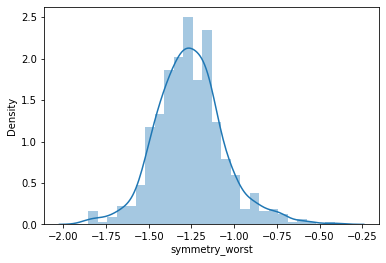

In [85]:
print(skew(df_new["symmetry_worst"]))
sns.distplot(df_new["symmetry_worst"])
plt.show()

In [86]:
#to reduce skewness in fractal_dimension_worst feature

In [87]:
min(df_new['fractal_dimension_worst'])

0.05504

In [88]:
skew(np.log(df_new['fractal_dimension_worst']))

0.7972357478531145

In [89]:
df_new['fractal_dimension_worst']=np.log(df_new['fractal_dimension_worst'])

0.7972357478531145


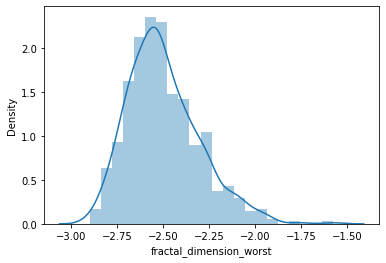

In [90]:
print(skew(df_new["fractal_dimension_worst"]))
sns.distplot(df_new["fractal_dimension_worst"])
plt.show()

Now all skewness from the dataset is removed

**Handling Imbalaced Data**

In [91]:
df_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,2.181386,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,-1.419231,-2.541985,1.0950,-0.099489,8.589,153.40,-5.051614,0.366030,0.05373,0.01587,-3.505558,-5.084336,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,-0.776311,-2.129472,1
1,20.57,2.609531,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,-1.708154,-2.870510,0.5435,-0.309382,3.398,74.08,-5.254300,0.235615,0.01860,0.01340,-4.276586,-5.645891,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,-1.290984,-2.418894,1
2,19.69,2.769829,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,-1.575520,-2.813577,0.7456,-0.239654,4.585,94.03,-5.091303,0.342166,0.03832,0.02058,-3.794240,-5.388023,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,-1.018047,-2.435203,1
3,11.42,2.731501,77.58,386.1,0.14250,0.28390,0.2414,0.10520,-1.348228,-2.328518,0.4956,0.144966,3.445,27.23,-4.698383,0.420928,0.05661,0.01867,-2.819596,-4.687683,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,-0.409774,-1.754464,1
4,20.29,2.429497,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,-1.709811,-2.833103,0.7572,-0.246796,5.438,94.44,-4.466278,0.290873,0.05688,0.01885,-4.042132,-5.275578,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,-1.442230,-2.566811,1


In [92]:
df_new['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Above dataset is Imbalanced 

**Balancing the Dataset**

In [93]:
x = df_new.drop("diagnosis" , axis=1)
y = df_new['diagnosis']

In [94]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,2.181386,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,-1.419231,-2.541985,1.0950,-0.099489,8.589,153.40,-5.051614,0.366030,0.05373,0.01587,-3.505558,-5.084336,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,-0.776311,-2.129472
1,20.57,2.609531,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,-1.708154,-2.870510,0.5435,-0.309382,3.398,74.08,-5.254300,0.235615,0.01860,0.01340,-4.276586,-5.645891,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,-1.290984,-2.418894
2,19.69,2.769829,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,-1.575520,-2.813577,0.7456,-0.239654,4.585,94.03,-5.091303,0.342166,0.03832,0.02058,-3.794240,-5.388023,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,-1.018047,-2.435203
3,11.42,2.731501,77.58,386.1,0.14250,0.28390,0.24140,0.10520,-1.348228,-2.328518,0.4956,0.144966,3.445,27.23,-4.698383,0.420928,0.05661,0.01867,-2.819596,-4.687683,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,-0.409774,-1.754464
4,20.29,2.429497,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,-1.709811,-2.833103,0.7572,-0.246796,5.438,94.44,-4.466278,0.290873,0.05688,0.01885,-4.042132,-5.275578,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,-1.442230,-2.566811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,2.818500,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,-1.756779,-2.878305,1.1760,0.227932,7.673,158.70,-4.575611,0.306914,0.05198,0.02454,-4.497213,-5.463428,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,-1.579879,-2.642965
565,20.13,3.045600,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,-1.741827,-2.894440,0.7655,0.901380,5.203,99.04,-5.155257,0.289368,0.03950,0.01678,-3.964369,-5.992265,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,-1.357901,-2.712510
566,16.60,3.039478,108.30,858.1,0.08455,0.10230,0.09251,0.05302,-1.838851,-2.873869,0.4564,0.072321,3.425,48.55,-5.132295,0.334150,0.04730,0.01557,-4.329055,-5.548832,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,-1.505979,-2.548486
567,20.60,3.083927,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,-1.428367,-2.656977,0.7260,0.466874,5.772,86.22,-5.032574,0.394893,0.07117,0.01664,-3.761880,-5.085628,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,-0.894774,-2.087474


In [95]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [96]:
counter = Counter(y)
print('Before y',counter)

smote = SMOTE(sampling_strategy='minority')
x_s , y_s = smote.fit_sample(x,y)
counter = Counter(y_s)
print('After',counter)

Before y Counter({0: 357, 1: 212})
After Counter({1: 357, 0: 357})


# **Scaling the Data**

In [97]:
ss = StandardScaler()
x_ss = ss.fit_transform(x_s)

# **Splitting the Data**

In [98]:
x_train , x_test , y_train , y_test = train_test_split(x_ss , y_s , test_size=0.3 , stratify=y_s)

In [99]:
x_ss.shape

(714, 30)

# **Modelling by Binary Classification Using Artificial Neural Network**

In [100]:
#Prediction : 1

In [101]:
model1 = tf.keras.Sequential(layers=[tf.keras.layers.Dense(15 , activation = 'tanh' , input_shape=(30,)),         
                                    tf.keras.layers.Dense(7 , activation = 'relu'),                        
                                    tf.keras.layers.Dense(1 , activation = 'sigmoid')])

In [102]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [103]:
model1.compile(optimizer="adam" , loss="binary_crossentropy") 
trained_model1 = model1.fit(x_train , y_train , epochs=150 , batch_size=30)

Epoch 1/150
17/17 [==============================] - 1s 2ms/step - loss: 0.8199
Epoch 2/150
17/17 [==============================] - 0s 1ms/step - loss: 0.5917
Epoch 3/150
17/17 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 4/150
17/17 [==============================] - 0s 2ms/step - loss: 0.3535
Epoch 5/150
17/17 [==============================] - 0s 1ms/step - loss: 0.2909
Epoch 6/150
17/17 [==============================] - 0s 1ms/step - loss: 0.2464
Epoch 7/150
17/17 [==============================] - 0s 1ms/step - loss: 0.2118
Epoch 8/150
17/17 [==============================] - 0s 1ms/step - loss: 0.1845
Epoch 9/150
17/17 [==============================] - 0s 1ms/step - loss: 0.1623
Epoch 10/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 11/150
17/17 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 12/150
17/17 [==============================] - 0s 2ms/step - loss: 0.1178
Epoch 13/150
17/17 [=================

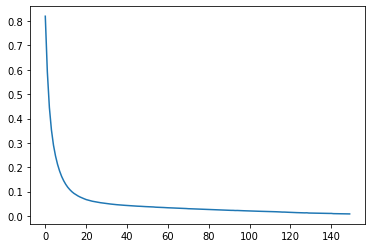

In [104]:
plt.plot(trained_model1.history['loss'])

In [105]:
y_hat1 = model1.predict(x_test)

In [106]:
y_hat1

array([[1.00000000e+00],
       [9.99997139e-01],
       [1.00000000e+00],
       [2.76446342e-04],
       [9.99999285e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.90291422e-05],
       [1.65318549e-02],
       [2.50737369e-02],
       [9.99991059e-01],
       [9.99950171e-01],
       [7.37901628e-02],
       [9.99998212e-01],
       [6.47366047e-04],
       [8.62403249e-05],
       [9.99999344e-01],
       [2.57909298e-04],
       [1.42748277e-05],
       [1.36312842e-03],
       [1.00000000e+00],
       [9.99990582e-01],
       [9.99897361e-01],
       [1.31751158e-05],
       [1.00000000e+00],
       [2.68777311e-01],
       [9.99982476e-01],
       [6.92986548e-02],
       [1.05016232e-02],
       [1.62798166e-03],
       [4.06905651e-01],
       [1.00000000e+00],
       [9.99998927e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.34977770e-01],
       [9.99999583e-01],
       [1.50084496e-04],
       [1.63475906e-05],
       [9.99999404e-01],


In [107]:
y_hat1 = np.where(y_hat1>=0.5 , 1 , 0).flatten()

In [108]:
roc_auc_score(y_test , y_hat1)

0.9767653167185877

In [109]:
#Prediction : 2

In [110]:
model2 = tf.keras.Sequential(layers=[tf.keras.layers.Dense(10 , activation = 'relu' , input_shape=(30,)),         
                                    tf.keras.layers.Dense(5 , activation = 'relu'),                        
                                    tf.keras.layers.Dense(1 , activation = 'sigmoid')])

In [111]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [112]:
model2.compile(optimizer="adam" , loss="binary_crossentropy") 
trained_model2 = model2.fit(x_train , y_train , epochs=100 , batch_size=50)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6108
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4179
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3823
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3522
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2789
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2585
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2396
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 13/100
10/10 [=================

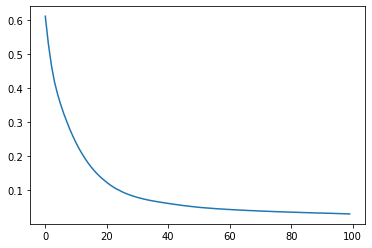

In [113]:
plt.plot(trained_model2.history['loss'])

In [114]:
y_hat2 = model2.predict(x_test)

In [115]:
y_hat2

array([[1.00000000e+00],
       [9.99802947e-01],
       [1.00000000e+00],
       [3.46182287e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.48161769e-03],
       [1.61002278e-02],
       [3.34714949e-02],
       [9.99720693e-01],
       [9.99551892e-01],
       [2.79909670e-02],
       [1.00000000e+00],
       [9.82949138e-03],
       [1.30915642e-03],
       [9.99997616e-01],
       [2.16788054e-03],
       [3.32751870e-03],
       [2.30109990e-02],
       [9.99972224e-01],
       [9.99999821e-01],
       [9.99999642e-01],
       [2.23478675e-03],
       [1.00000000e+00],
       [9.99264002e-01],
       [9.99639809e-01],
       [1.01335436e-01],
       [7.20897913e-02],
       [2.05062330e-02],
       [6.52805746e-01],
       [1.00000000e+00],
       [9.99999285e-01],
       [9.99999702e-01],
       [1.00000000e+00],
       [9.95476782e-01],
       [9.99996543e-01],
       [4.87485528e-03],
       [3.52233648e-04],
       [9.99995768e-01],


In [116]:
y_hat2 = np.where(y_hat2>=0.5 , 1 , 0).flatten()

In [117]:
roc_auc_score(y_test , y_hat2)

0.9675493250259605

In [118]:
#Prediction : 3

In [119]:
model3 = tf.keras.Sequential(layers=[tf.keras.layers.Dense(10 , activation = 'tanh' , input_shape=(30,)),         
                                    tf.keras.layers.Dense(5 , activation = 'tanh'),                        
                                    tf.keras.layers.Dense(1 , activation = 'sigmoid')])

In [120]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [121]:
model3.compile(optimizer="adam" , loss="binary_crossentropy") 
trained_model3 = model3.fit(x_train , y_train , epochs=70 , batch_size=50)

Epoch 1/70
10/10 [==============================] - 0s 2ms/step - loss: 0.6639
Epoch 2/70
10/10 [==============================] - 0s 2ms/step - loss: 0.6005
Epoch 3/70
10/10 [==============================] - 0s 2ms/step - loss: 0.5456
Epoch 4/70
10/10 [==============================] - 0s 2ms/step - loss: 0.4967
Epoch 5/70
10/10 [==============================] - 0s 2ms/step - loss: 0.4539
Epoch 6/70
10/10 [==============================] - 0s 2ms/step - loss: 0.4137
Epoch 7/70
10/10 [==============================] - 0s 2ms/step - loss: 0.3793
Epoch 8/70
10/10 [==============================] - 0s 2ms/step - loss: 0.3491
Epoch 9/70
10/10 [==============================] - 0s 2ms/step - loss: 0.3212
Epoch 10/70
10/10 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 11/70
10/10 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 12/70
10/10 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 13/70
10/10 [==============================

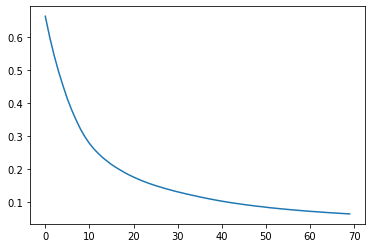

In [122]:
plt.plot(trained_model3.history['loss'])

In [123]:
y_hat3 = model3.predict(x_test)

In [124]:
y_hat3

array([[0.97595036],
       [0.97236687],
       [0.97595495],
       [0.08024165],
       [0.9750724 ],
       [0.97589195],
       [0.9759158 ],
       [0.03129107],
       [0.03403726],
       [0.04380229],
       [0.9715971 ],
       [0.9718095 ],
       [0.0489125 ],
       [0.9758489 ],
       [0.03436354],
       [0.03077036],
       [0.9750605 ],
       [0.03116372],
       [0.03177094],
       [0.03272057],
       [0.9753102 ],
       [0.9752398 ],
       [0.97478676],
       [0.0299907 ],
       [0.9759066 ],
       [0.60640866],
       [0.971019  ],
       [0.07645163],
       [0.10249576],
       [0.0492788 ],
       [0.57017773],
       [0.97592306],
       [0.97565293],
       [0.9757887 ],
       [0.9759481 ],
       [0.05598897],
       [0.97565246],
       [0.03090584],
       [0.02993637],
       [0.9754446 ],
       [0.03872651],
       [0.03990701],
       [0.97524583],
       [0.9756715 ],
       [0.04196343],
       [0.03167853],
       [0.9759326 ],
       [0.030

In [125]:
y_hat3 = np.where(y_hat3>=0.5 , 1 , 0).flatten()

In [126]:
roc_auc_score(y_test , y_hat3)

0.9767653167185877

**Conclusion : Accuracy up to 97.67% by Model:3 is acheived by considering activation functions as tanh , tanh & sigmoid. Hence by Model:3 Type of Tumour i.e. whether it is Cancerous or Non-Cancerous can be classified correctly.**